In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('hourly.csv')

In [82]:
df.head()

,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     32896 non-null  object 
 1   PJM_Load_MW  32896 non-null  float64
dtypes: float64(1), object(1)
memory usage: 514.1+ KB


In [84]:
df.shape[0]

32896

In [85]:
df.Datetime.nunique()

32896

In [86]:
df.Datetime.nunique() == df.shape[0] #duplicate yok

True

In [87]:
df[df.Datetime.isnull()]

,Datetime,PJM_Load_MW


In [88]:
df[df.PJM_Load_MW.isnull()] 
#missing value yok. zaten df.info() da da görmüştük olmadığını.

,Datetime,PJM_Load_MW


In [89]:
df.describe()

,PJM_Load_MW
count,32896.000000
mean,29766.427408
std,5849.769954
min,17461.000000
25%,25473.000000
50%,29655.000000
75%,33073.250000
max,54030.000000


In [90]:
IQR = 33073.250000 - 25473.000000

In [91]:
max_l = 33073.250000 + 1.5*IQR

In [92]:
max_l

44473.625

In [93]:
min_l = 25473.000000 - 1.5*IQR

In [94]:
min_l

14072.625

In [95]:
outliers = df[(df.PJM_Load_MW > max_l) | (df.PJM_Load_MW < min_l)]

In [96]:
outliers.sample(5)

,Datetime,PJM_Load_MW
3924,1998-07-21 14:00:00,46420.0
10595,1999-07-18 15:00:00,45116.0
27605,2001-08-09 13:00:00,52527.0
3732,1998-07-29 14:00:00,45235.0
27345,2001-08-20 17:00:00,45676.0


In [105]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [106]:
df

,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0
...,...,...
32891,2001-01-01 20:00:00,35209.0
32892,2001-01-01 21:00:00,34791.0
32893,2001-01-01 22:00:00,33669.0
32894,2001-01-01 23:00:00,31809.0


In [108]:
df['hour'] = df.Datetime.dt.hour

In [109]:
df['month'] = df.Datetime.dt.month

In [110]:
df['season'] = df.Datetime.dt.quarter

In [112]:
df['day_of_week'] = df.Datetime.dt.dayofweek

In [113]:
df

,Datetime,PJM_Load_MW,hour,month,season,day_of_week
0,1998-12-31 01:00:00,29309.0,1,12,4,3
1,1998-12-31 02:00:00,28236.0,2,12,4,3
2,1998-12-31 03:00:00,27692.0,3,12,4,3
3,1998-12-31 04:00:00,27596.0,4,12,4,3
4,1998-12-31 05:00:00,27888.0,5,12,4,3
...,...,...,...,...,...,...
32891,2001-01-01 20:00:00,35209.0,20,1,1,0
32892,2001-01-01 21:00:00,34791.0,21,1,1,0
32893,2001-01-01 22:00:00,33669.0,22,1,1,0
32894,2001-01-01 23:00:00,31809.0,23,1,1,0


In [114]:
sozluk = {0 :'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 
          4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}

In [116]:
df.day_of_week = df.day_of_week.map(sozluk)

In [117]:
df

,Datetime,PJM_Load_MW,hour,month,season,day_of_week
0,1998-12-31 01:00:00,29309.0,1,12,4,Thursday
1,1998-12-31 02:00:00,28236.0,2,12,4,Thursday
2,1998-12-31 03:00:00,27692.0,3,12,4,Thursday
3,1998-12-31 04:00:00,27596.0,4,12,4,Thursday
4,1998-12-31 05:00:00,27888.0,5,12,4,Thursday
...,...,...,...,...,...,...
32891,2001-01-01 20:00:00,35209.0,20,1,1,Monday
32892,2001-01-01 21:00:00,34791.0,21,1,1,Monday
32893,2001-01-01 22:00:00,33669.0,22,1,1,Monday
32894,2001-01-01 23:00:00,31809.0,23,1,1,Monday


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='hour', ylabel='PJM_Load_MW'>

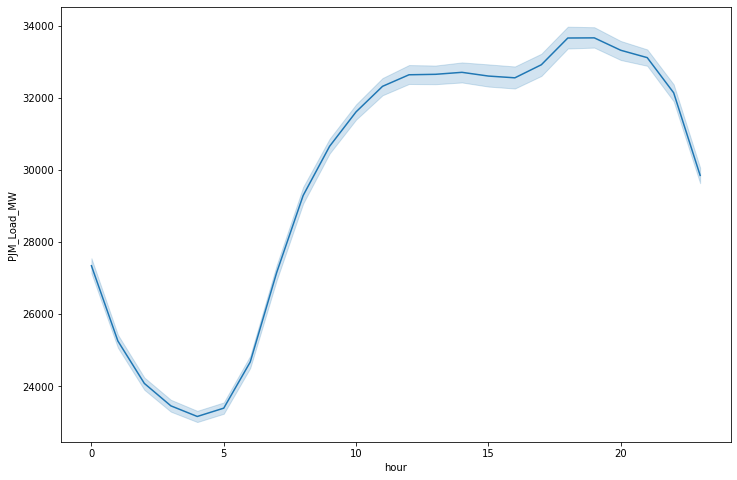

In [125]:
plt.figure(figsize = [12,8])
sns.lineplot(x = df.hour, y = df.PJM_Load_MW)

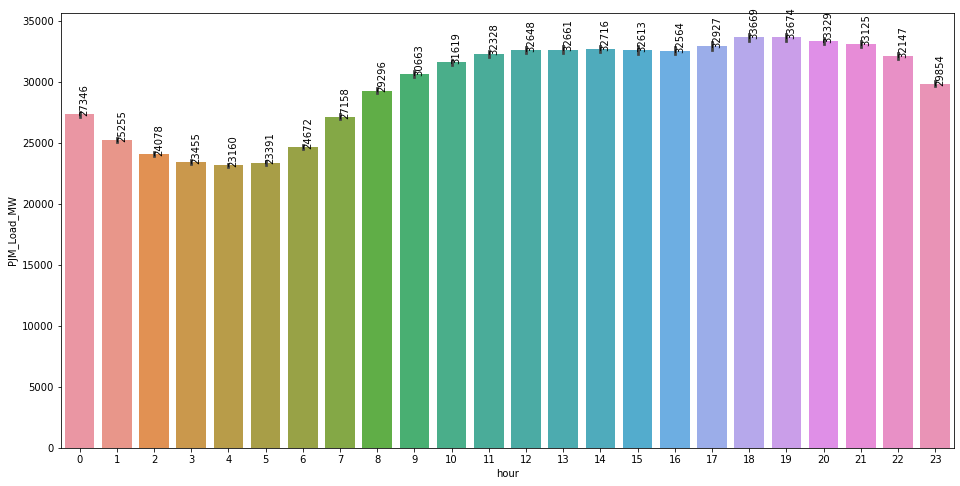

In [147]:
plt.figure(figsize = [16,8]) #en fazla sabah 10 ile akşam 10 arası kullanım oluyor.
sns.barplot(x = df.hour, y = df.PJM_Load_MW)
y = df.groupby('hour')['PJM_Load_MW'].mean()
for i,v in enumerate(y):
    plt.text(i,v+30, str(int(v)), rotation ='vertical')

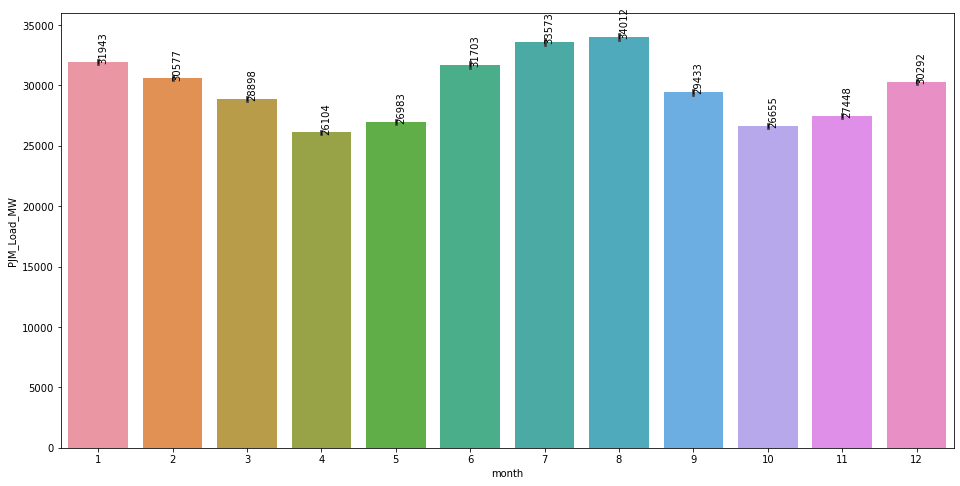

In [148]:
plt.figure(figsize = [16,8])   #aralık, ocak, şubat ve haziran, temmuz, ağustos aylarında elektrik tüketimi artıyor. 
sns.barplot(x = df.month, y = df.PJM_Load_MW)
y = df.groupby('month')['PJM_Load_MW'].mean()
for i,v in enumerate(y):
    plt.text(i,v+30, str(int(v)), rotation ='vertical')

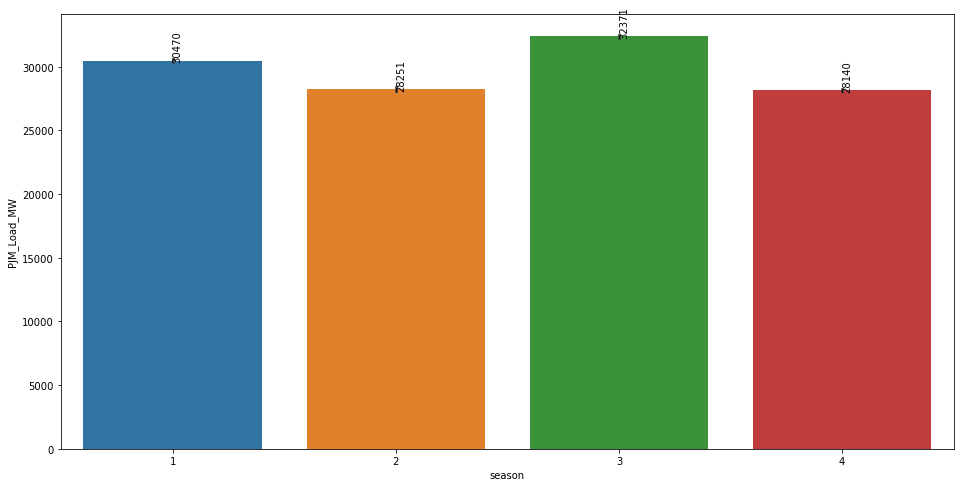

In [149]:
plt.figure(figsize = [16,8])   #temmuz, ağustos, eylül aylarını içeren 3.quarterda tüketim daha fazla
sns.barplot(x = df.season, y = df.PJM_Load_MW)
y = df.groupby('season')['PJM_Load_MW'].mean()
for i,v in enumerate(y):
    plt.text(i,v+30, str(int(v)), rotation ='vertical')

<AxesSubplot:xlabel='day_of_week', ylabel='PJM_Load_MW'>

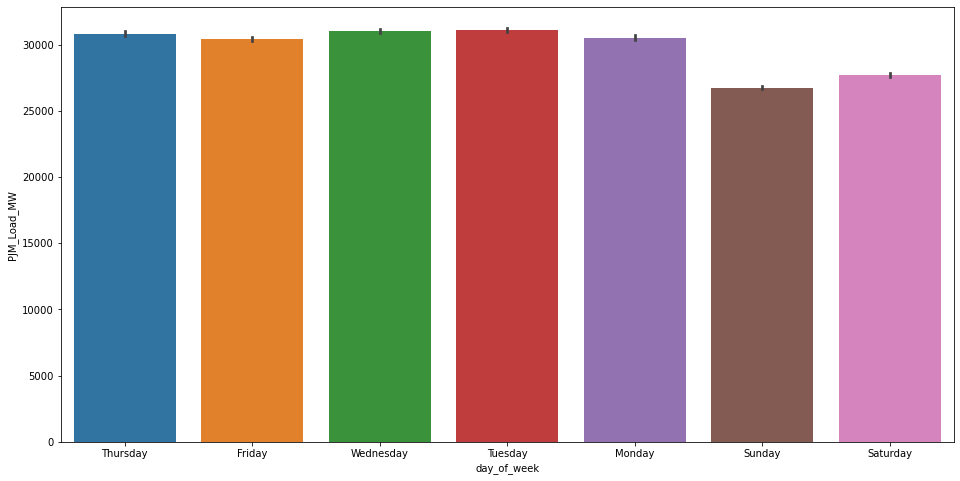

In [151]:
plt.figure(figsize = [16,8])   #hafta sonları tüketim az oluyor.
sns.barplot(x = df.day_of_week, y = df.PJM_Load_MW)
